# Descriptive statistics

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':[12,8]})

# Loading data
df = pd.read_pickle('STING_DB.pkl')
df.head()

,n_patient,id,label,array,n_cores,sp,sp_date,turb,histo,lesion,...,bcg,bcg_date,mitomycin,progression_stage_any,progression_stage_next,recurrence_any,recurrence_next,progression_grade_any,progression_grade_next,fu_months
0,1,19870070301,OO,935,1.0,05-S-9869,2005-12-07,4,4,Non-tumor,...,No,NaT,0,No,Yes,Yes,Yes,No,Yes,270.933333
1,1,19870070301,OO,931,3.0,07-S-11432,2007-11-14,5,1,Low-grade,...,No,NaT,0,No,No,Yes,No,No,No,270.933333
2,1,19870070301,OO,931,3.0,07-S-11432,2007-11-14,5,1,Low-grade,...,No,NaT,0,No,No,Yes,No,No,No,270.933333
3,1,19870070301,OO,931,3.0,07-S-11432,2007-11-14,5,1,Low-grade,...,No,NaT,0,No,No,Yes,No,No,No,270.933333
4,1,19870070301,OO,931,3.0,05-S-4662,2005-06-10,3,2,High-grade,...,No,NaT,0,No,No,Yes,No,No,No,270.933333


## Clinical features

In [2]:
# Creating the dataframe containing clinical features, based on the full dataframe and grouped by the patient number ('n_patient')
# These are features that are identical for all the rows corresponding to the same patient
# Thus, using 'max' (or 'min', for what matters) makes sense for aggregating cases. 'max' is just a clever trick to obtaing the unique values for the corresponding patient
# This trick only works if there is only 1 unique value for each patient. Hence, the need to check using 'unique' before (which has been done, obviously)
df_clinical = df.groupby('n_patient').agg({'sex':max,'age_dx':max,'fu_months':max,'recurrence_any':max,'progression_grade_any':max,'progression_stage_any':max,'outcome':max})
df_clinical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 1 to 61
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sex                    61 non-null     object 
 1   age_dx                 61 non-null     float64
 2   fu_months              61 non-null     float64
 3   recurrence_any         61 non-null     object 
 4   progression_grade_any  61 non-null     object 
 5   progression_stage_any  61 non-null     object 
 6   outcome                61 non-null     object 
dtypes: float64(2), object(5)
memory usage: 3.8+ KB


## Sex

In [3]:
df_clinical['sex'].value_counts().to_frame()

,sex
Male,41
Female,20


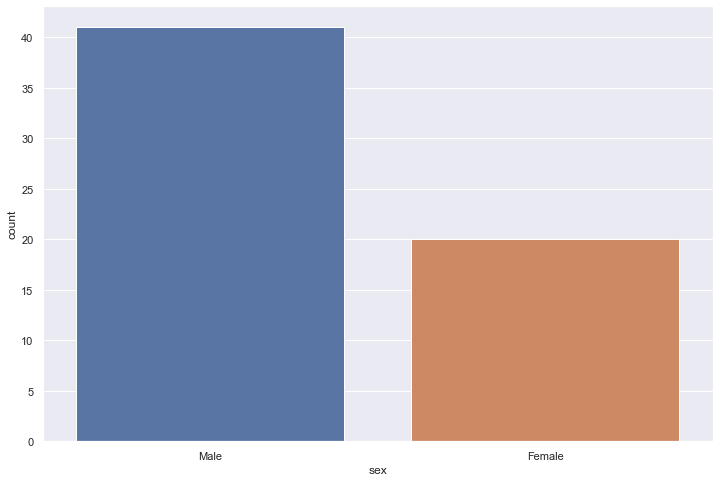

In [4]:
ax = sns.countplot(df_clinical['sex'])

## Age at diagnosis, in years

In [5]:
df_clinical['age_dx'].describe().astype('int').to_frame()

,age_dx
count,61
mean,68
std,9
min,46
25%,61
50%,68
75%,74
max,88


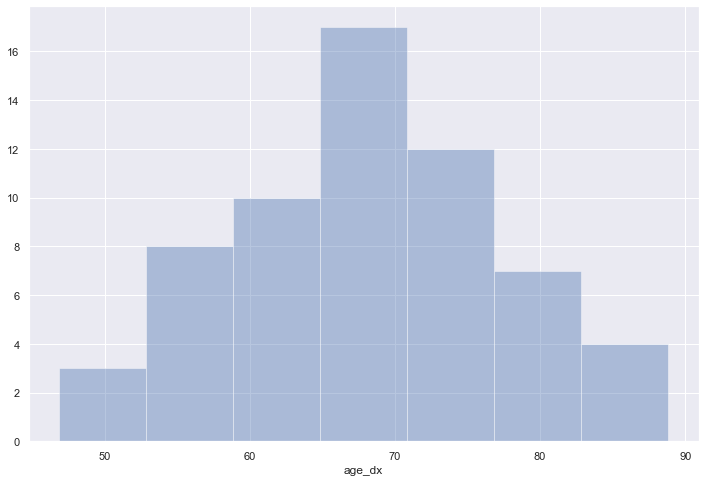

In [6]:
ax = sns.distplot(df_clinical['age_dx'], kde=False)

## Follow-up, in months

In [7]:
df_clinical['fu_months'].describe().astype('int').to_frame()

,fu_months
count,61
mean,42
std,45
min,2
25%,14
50%,38
75%,49
max,270


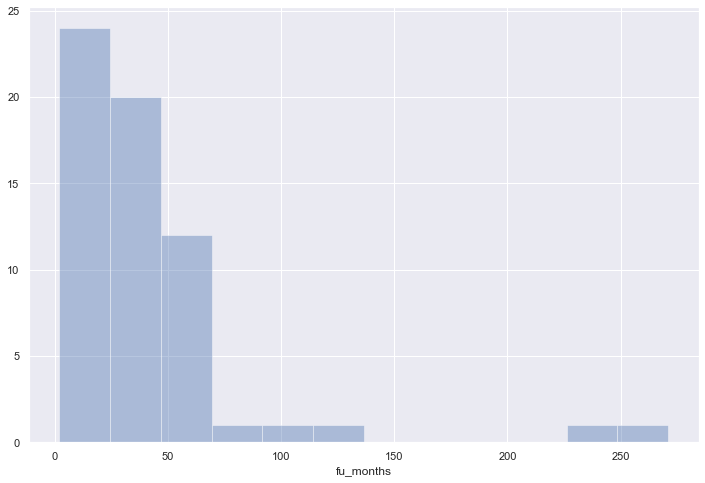

In [8]:
ax = sns.distplot(df_clinical['fu_months'], kde=False, bins=12)

## Tumor recurrence during follow-up

In [9]:
df_clinical['recurrence_any'].value_counts(sort=False).to_frame()

,recurrence_any
No,9
Yes,52


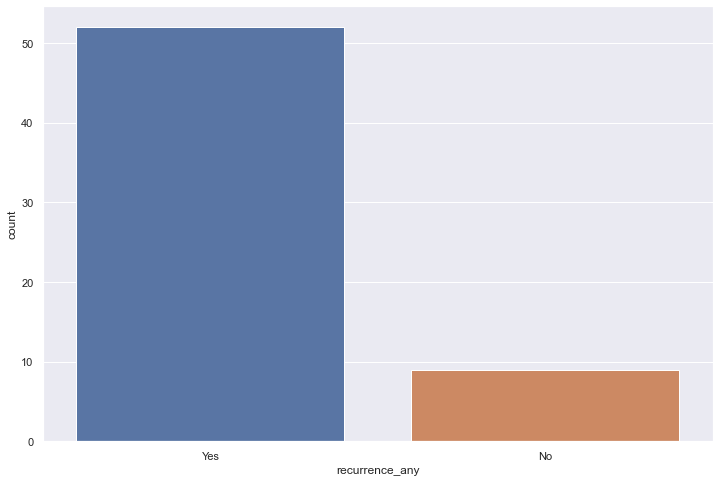

In [10]:
ax = sns.countplot(df_clinical['recurrence_any'])

## Grade progression during follow-up

In [11]:
df_clinical['progression_grade_any'].value_counts(sort=False).to_frame()

,progression_grade_any
No,56
Yes,5


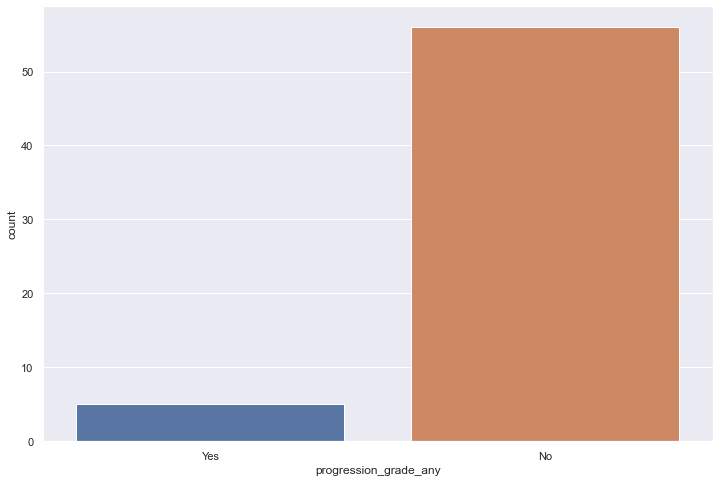

In [12]:
ax = sns.countplot(df_clinical['progression_grade_any'], order=['Yes','No'])

## Stage progression during follow-up

In [13]:
df_clinical['progression_stage_any'].value_counts(sort=False).to_frame()

,progression_stage_any
No,55
Yes,6


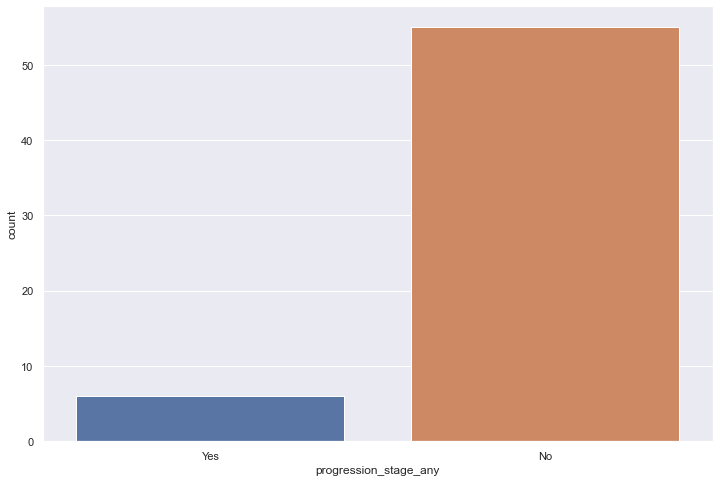

In [14]:
ax = sns.countplot(df_clinical['progression_stage_any'], order=['Yes','No'])

## Outcome

In [15]:
df_clinical['outcome'].value_counts().to_frame()

,outcome
Alive,49
Lost at follow-up,6
Dead,6


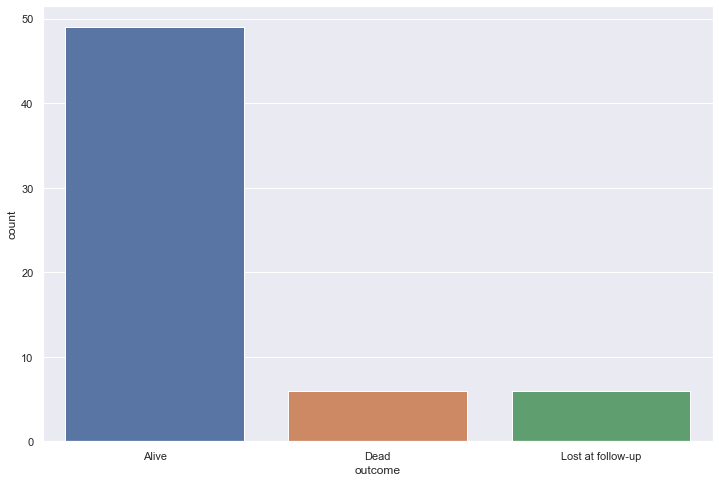

In [16]:
ax = sns.countplot(df_clinical['outcome'], order=['Alive','Dead','Lost at follow-up'])

# Pathologic features

In [17]:
df_path = df.groupby('sp').agg({'lesion':'unique','pt':'unique','recurrence_any':'unique','recurrence_next':'unique','progression_grade_any':'unique','progression_grade_next':'unique','progression_stage_any':'unique','progression_stage_next':'unique'})
df_path

,lesion,pt,recurrence_any,recurrence_next,progression_grade_any,progression_grade_next,progression_stage_any,progression_stage_next
sp,,,,,,,,
01-S-10015,[High-grade],[Ta],[Yes],[No],[No],[No],[No],[No]
01-S-7500,[High-grade],[Ta],[Yes],[Yes],[No],[No],[No],[No]
01-S-9347,[High-grade],[Ta],[Yes],[Yes],[No],[No],[No],[No]
02-S-2362,[Non-tumor],[nan],[Yes],[No],[No],[No],[No],[No]
02-S-9202,"[High-grade, Invasive]",[T1],[Yes],[Yes],[No],[No],[Yes],[No]
...,...,...,...,...,...,...,...,...
98-S-4588,[Low-grade],[Ta],[Yes],[Yes],[No],[No],[No],[No]
98-S-4867,"[High-grade, Invasive]",[T1],[Yes],[Yes],[No],[No],[Yes],[No]
98-S-8041,"[High-grade, Invasive]",[T1],[Yes],[Yes],[No],[No],[Yes],[Yes]


In [18]:
df_path['lesion'].astype('str').value_counts()

['Low-grade']                      41
['High-grade']                     32
['High-grade' 'Invasive']          23
['Non-tumor']                      19
['Invasive']                       12
['CIS']                             5
['CIS' 'High-grade']                2
['Low-grade' 'Non-tumor']           2
['High-grade' 'Non-tumor']          1
['CIS' 'Non-tumor']                 1
['High-grade' 'Invasive' 'CIS']     1
['Low-grade' 'Invasive']            1
['CIS' 'Invasive']                  1
Name: lesion, dtype: int64

In [19]:
df_path['pt'].astype('str').value_counts()

['Ta']         75
['T1']         32
[nan]          19
['Tis']         7
['T2']          5
['Ta' 'T1']     2
['Ta' nan]      1
Name: pt, dtype: int64

In [20]:
print(pd.crosstab(df['lesion'], df['pt']))

pt          T1  T2   Ta  Tis
lesion                      
CIS          4   3    0   13
High-grade  61   3  100    4
Invasive    93  15    0    0
Low-grade    3   0  113    0
Non-tumor    0   0    4    1


In [21]:
df_path['recurrence_any'].astype('str').value_counts()

['Yes']    126
['No']      15
Name: recurrence_any, dtype: int64

In [22]:
df_path['recurrence_next'].astype('str').value_counts()

['Yes']    72
['No']     50
[nan]      19
Name: recurrence_next, dtype: int64

In [23]:
df_path['progression_grade_any'].astype('str').value_counts()

['No']     128
['Yes']     13
Name: progression_grade_any, dtype: int64

In [24]:
df_path['progression_grade_next'].astype('str').value_counts()

['No']     117
[nan]       15
['Yes']      9
Name: progression_grade_next, dtype: int64

In [25]:
df_path['progression_stage_any'].astype('str').value_counts()

['No']     123
['Yes']     18
Name: progression_stage_any, dtype: int64

In [26]:
df_path['progression_stage_next'].astype('str').value_counts()

['No']     112
[nan]       19
['Yes']     10
Name: progression_stage_next, dtype: int64